# MatplotLib

In [1]:


# import seaborn as sns
%matplotlib widget
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import pandas as pd
import matplotlib.ticker as mtick
import matplotlib.dates as mdate
import yfinance as yf
from datetime import datetime, date
import numpy as np
import os
import mplcyberpunk
import seaborn as sns


In [2]:
lista_acoes_inicial = ['WEGE3', 'VALE3', 'PETR4', 'ABEV3', 'IBOV']

lista_acoes = [acao + '.SA' for acao in lista_acoes_inicial]

if 'IBOV.SA' in lista_acoes:
    lista_acoes.remove('IBOV.SA')
    lista_acoes.append('^BVSP')

cotacoes = yf.download(lista_acoes, '2008-01-01', '2023-01-01')['Adj Close']
cotacoes


[*********************100%%**********************]  5 of 5 completed


,ABEV3.SA,PETR4.SA,VALE3.SA,WEGE3.SA,^BVSP
Date,,,,,
2008-01-02,2.891679,12.437962,26.739397,2.677697,62815.0
2008-01-03,2.902259,12.237806,26.877937,2.673411,62892.0
2008-01-04,2.865348,11.637353,25.908113,2.666986,61037.0
2008-01-07,2.797640,11.295669,25.446291,2.677697,60772.0
2008-01-08,2.842073,11.916135,25.954300,2.602721,62081.0
...,...,...,...,...,...
2022-12-23,14.620000,20.212734,81.991486,37.959820,109698.0
2022-12-26,14.520000,20.067896,82.741867,37.654171,108738.0
2022-12-27,14.520000,20.204685,84.717575,37.476696,108347.0


In [3]:
def janelas_moveis_retorno_acumulado(df, dias, anos):
    janela_movel = df.pct_change(periods = dias).dropna()

    lista_retornos = []

    for coluna in df.columns:
        media_retorno_acumulado = janela_movel[coluna].mean()
        valor_ao_ano = (1 + media_retorno_acumulado) **(1/anos) -1
        lista_retornos.append(valor_ao_ano)
        if anos == 10:
            print(f'Ação: {coluna} - valor ao ano: {valor_ao_ano}')
            # fig, ax = plt.subplots()
            # ax.plot(valor_ao_ano)
    
    return lista_retornos

janela_1_ano_geral = janelas_moveis_retorno_acumulado(cotacoes, 250, anos = 1)
janela_3_ano_geral = janelas_moveis_retorno_acumulado(cotacoes, 250 * 3, anos = 3)
janela_5_ano_geral = janelas_moveis_retorno_acumulado(cotacoes, 250 * 5, anos = 5)
janela_10_ano_geral = janelas_moveis_retorno_acumulado(cotacoes, 250 * 10, anos = 10)

tabela_janelas_moveis = pd.DataFrame(
    data = {'1 ano': janela_1_ano_geral,
    '3 anos': janela_3_ano_geral,
    '5 anos': janela_5_ano_geral,
    '10 anos': janela_10_ano_geral,
    },
    index = ['ABEV3.SA', "PETR4.SA", 'VALE3.SA', 'WEGE3.SA', '^BVSP'])
print(lista_acoes_inicial)

# print(tabela_janelas_moveis)
for coluna in tabela_janelas_moveis.columns:
    tabela_janelas_moveis[f'{coluna}'] = (tabela_janelas_moveis[f'{coluna}'].round(2) * 100)
tabela_janelas_moveis

Ação: ABEV3.SA - valor ao ano: 0.15211013644034876
Ação: PETR4.SA - valor ao ano: 0.03523104462798177
Ação: VALE3.SA - valor ao ano: 0.09156020600566195
Ação: WEGE3.SA - valor ao ano: 0.26604634739137456
Ação: ^BVSP - valor ao ano: 0.058281891139233766
['WEGE3', 'VALE3', 'PETR4', 'ABEV3', 'IBOV']


C:\Users\Gabriel\AppData\Local\Temp\ipykernel_15340\3338714010.py:2: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Call ffill before calling pct_change to retain current behavior and silence this warning.
  janela_movel = df.pct_change(periods = dias).dropna()


,1 ano,3 anos,5 anos,10 anos
ABEV3.SA,17.0,18.0,18.0,15.0
PETR4.SA,12.0,9.0,9.0,4.0
VALE3.SA,18.0,17.0,18.0,9.0
WEGE3.SA,29.0,30.0,27.0,27.0
^BVSP,8.0,7.0,7.0,6.0


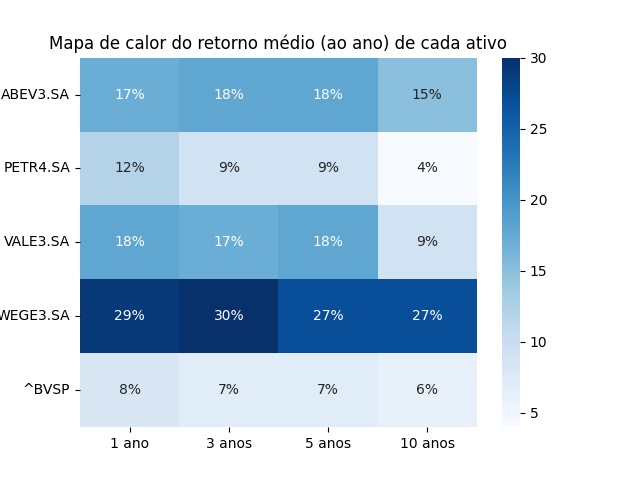

In [4]:
# Plotando o grafico

ax = sns.heatmap(tabela_janelas_moveis, annot=True, cmap= 'Blues', fmt= 'g')

plt.title("Mapa de calor do retorno médio (ao ano) de cada ativo")
plt.yticks(rotation = 0)


for t in ax.texts:
    t.set_text(t.get_text() + '%')

plt.show()